In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, 'utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]
Virtual memory usage - total: 187 GB / available: 183 GB / percent used: 1.9 %


In [21]:
# For parallelisation
from dask.distributed import Client
client = Client(n_workers=16, threads_per_worker=1, memory_limit='4GB')
client

Client Scheduler: tcp://127.0.0.1:35309 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 16 Cores: 16 Memory: 64.00 GB


In [28]:
path_interp = '/bettik/lalandmi/phd/ESA_CCI_SNOW/preprocess/scfg/AVHRR_MERGED/v2.0/daily/'
path_orig = '/bettik/lalandmi/phd/ESA_CCI_SNOW/dap.ceda.ac.uk/neodc/esacci/snow/data/scfg/AVHRR_MERGED/v2.0/'

In [34]:
Ifrane = {'lat': 33.5, 'lon': -5.16}
Midelt = {'lat': 32.67, 'lon': -4.74}
year = '1982'

In [35]:
scf_Ifrane_interp = xr.open_mfdataset(
    path_interp+'/'+year+'/*-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv2.0_interp.nc', parallel=True
).sel(lat=Ifrane['lat'], lon=Ifrane['lon'], method='nearest').scfg_interp.load()

scf_Ifrane_orig = xr.open_mfdataset(
    path_orig+'/'+year+'/*/*-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv2.0.nc', parallel=True
).sel(lat=Ifrane['lat'], lon=Ifrane['lon'], method='nearest').scfg.load()

In [47]:
scf_Midelt_interp = xr.open_mfdataset(
    path_interp+'/'+year+'/*-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv2.0_interp.nc', parallel=True
).sel(lat=Midelt['lat'], lon=Midelt['lon'], method='nearest').scfg_interp.load()

scf_Midelt_orig = xr.open_mfdataset(
    path_orig+'/'+year+'/*/*-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv2.0.nc', parallel=True
).sel(lat=Midelt['lat'], lon=Midelt['lon'], method='nearest').scfg.load()

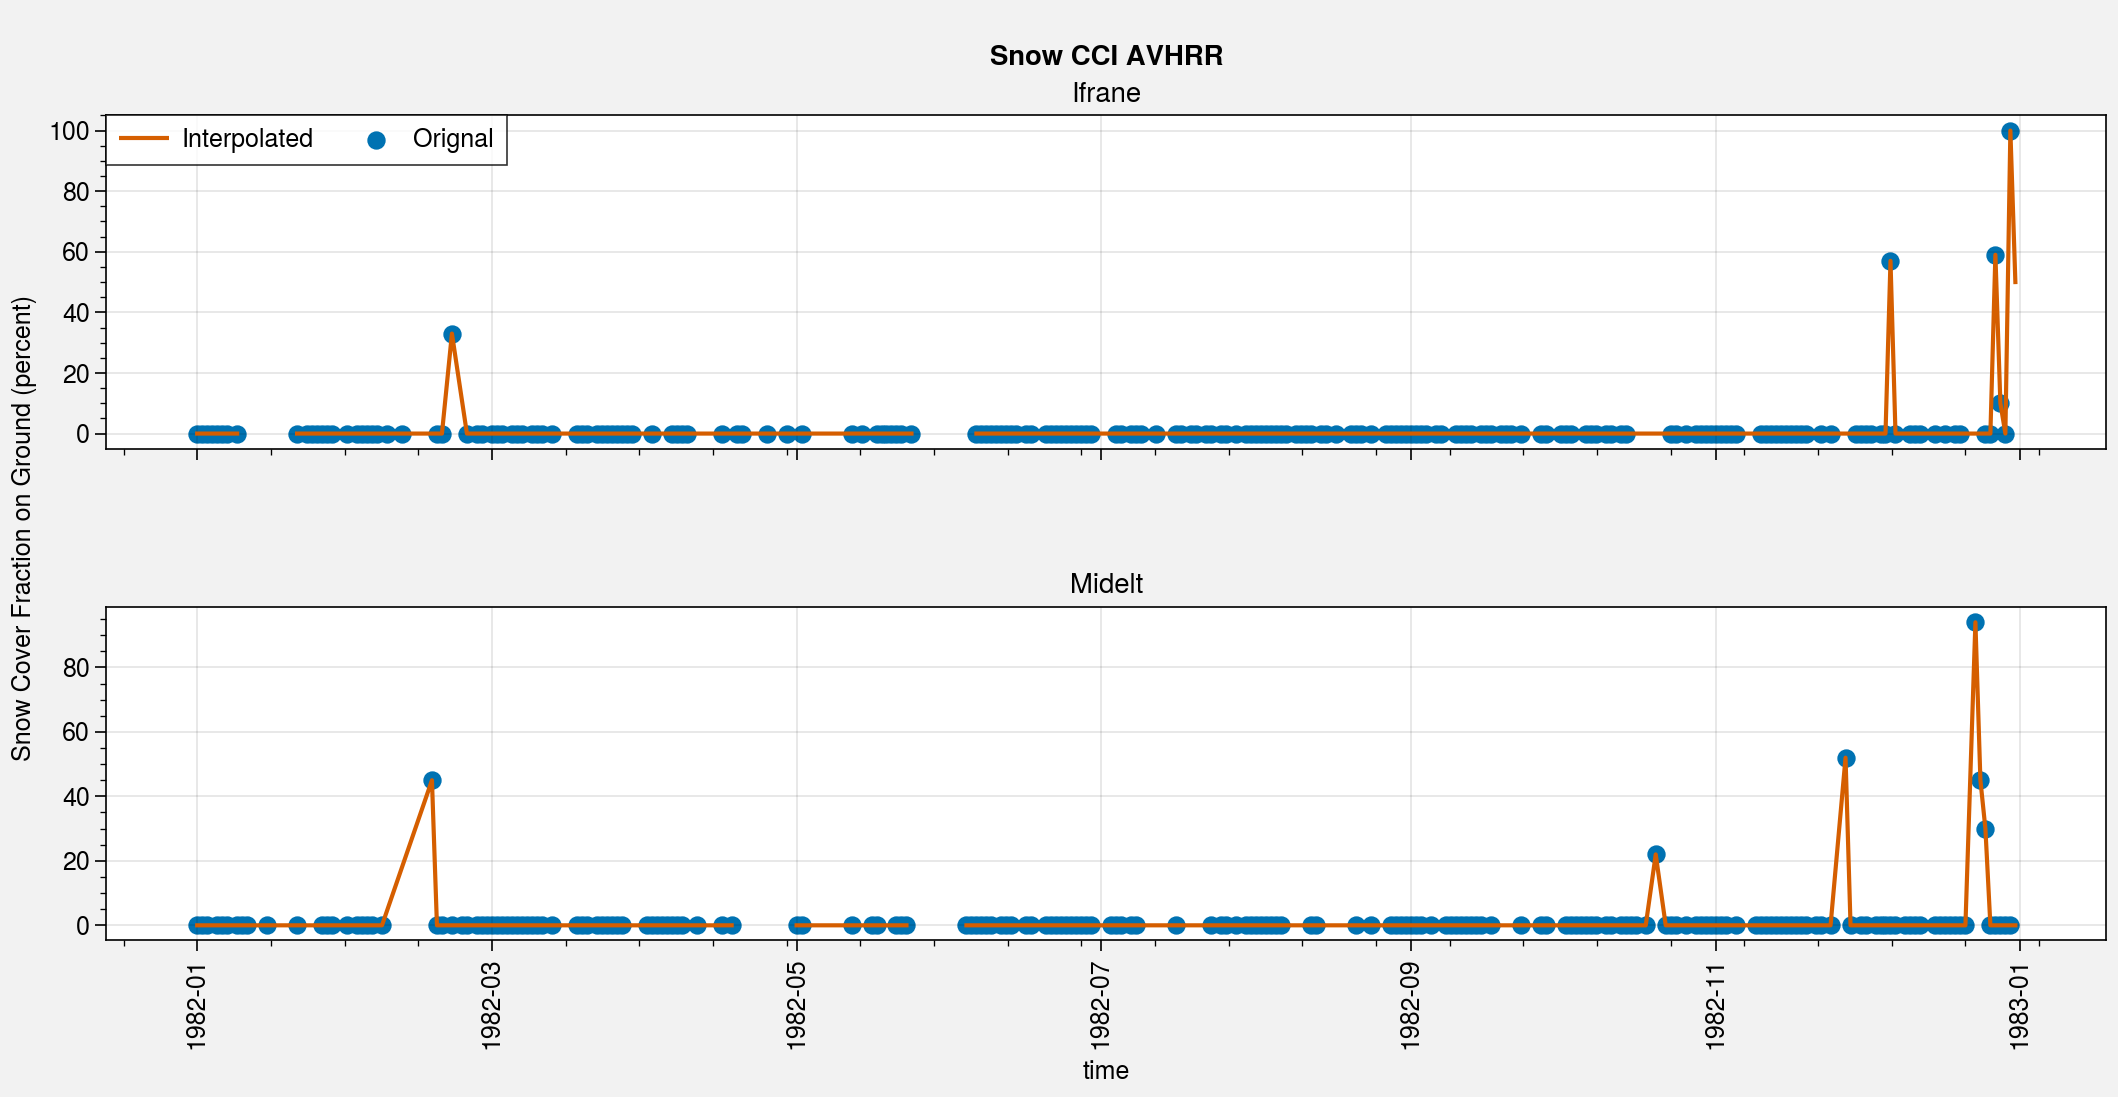

In [58]:
fig, axs = plot.subplots(nrows=2, aspect=6, axwidth=10)

axs[0].scatter(scf_Ifrane_orig.where(scf_Ifrane_orig <= 100), label='Orignal')
axs[0].plot(scf_Ifrane_interp, color='C1', label='Interpolated')
axs[0].format(title='Ifrane')

axs[0].legend()

axs[1].scatter(scf_Midelt_orig.where(scf_Midelt_orig <= 100), label='Orignal')
axs[1].plot(scf_Midelt_interp, color='C1', label='Interpolated')
axs[1].format(title='Midelt')

axs.format(suptitle='Snow CCI AVHRR')

fig.save('check_Hamid_SnowCCI_AVHRR_1982.jpg')

In [59]:
client.close()